In [1]:
%load_ext autoreload
%autoreload 2

import sys
import glob
from datetime import datetime
import re
from pathlib import Path
import xml.etree.ElementTree as ET
import time

import pandas as pd
from yaspin import yaspin
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sys.path.append('..')
sys.path.append('../../libs/tools/')
from tag_generator.tag_generator import preprocessing, feature_pipeline

[nltk_data] Downloading package punkt to /Users/tatia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tatia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tatia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
today = datetime.now()
time = today.strftime("%H%M%S")

prefix = "/Users/tatia/Developer/tag-generator/core/data/{stage}"

# Data cleaning for tag generation on StackOverflow Questions

So let's start with reading the file. We ve got one big file that can't be hold in the memory. SO we will cut it down in chunk.

## Extract

In [3]:
input_xml_file_path = "/Users/tatia/Developer/data/stackoverflow/Posts.xml"
#input_xml_file_path = "/Users/tatia/Developer/test/sample.xml"
path = Path(input_xml_file_path)
output_xml_dir = path.parent.absolute()/"chunk"
print(output_xml_dir)
file_name = str(path.stem)+"_{:07d}.xml"

Path(output_xml_dir).mkdir(parents=True, exist_ok=True)
output_xml_file = str(Path(output_xml_dir/file_name))
print(output_xml_file)


start = '<?xml version="1.0" encoding="utf-8"?>'
opening = '<posts>'
closing = '</posts>'

def create_chunk(size: int, output_xml_file: str, start:str = start, opening:str = opening, closing:str = closing):
    new_file = open(output_xml_file.format(0), 'wt')
    with yaspin(text="Loading") as spinner:
        with open(input_xml_file_path, 'r') as f_xml:
            i = 0
            k = 0
            for line in f_xml:
                if closing in line:
                    spinner.ok("✅")
                    new_file.write(line)
                    new_file.close()
                    print(f"{k} total file")
                    break
                if i < size:
                    #elmt = parser.feed(line)
                    elmt = ET.Element(line)
                    new_file.write(line)
                    i = i + 1
                elif i == size:
                    new_file.write(line)
                    new_file.write(closing)
                    new_file.close()
                    i = 0
                    k = k + 1
                    new_file = open(output_xml_file.format(k), 'wt')
                    new_file.write(start)
                    new_file.write("\n")
                    new_file.write(opening)
                    new_file.write("\n")
                    spinner.text = f"next chunk {k}"
  
    spinner.ok("✅")

/Users/tatia/Developer/data/stackoverflow/chunk
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_{:07d}.xml


In [4]:
# size = 5000
# try:
#     if DATA_IS_LOADED:
#         print("tada")
# except NameError as ne:
#     create_chunk(size, output_xml_file)
# DATA_IS_LOADED = True

In [5]:
step = 25

In [6]:
files = glob.glob(f"{str(output_xml_dir)}/*.xml")

sorted_files = sorted(files)
for i in sorted_files[0: len(sorted_files): step]:
    print(i)

/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000000.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000025.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000050.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000075.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000100.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000125.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000150.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000175.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000200.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000225.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000250.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000275.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000300.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000325.xml
/Users/tatia/Developer/data/stackoverflow/chunk/Posts_0000350.xml
/Users/tat

In [7]:
import pandas as pd
import glob
from lxml.etree import XMLSyntaxError
df_list = []

files = glob.glob(f"{str(output_xml_dir)}/*.xml")
sorted_files = sorted(files)


with yaspin(text="Loading") as spinner:
    for file_name in sorted_files[0: len(sorted_files): step]:
        path = Path(file_name)
        spinner.text = str(path.stem)
        try:
            df = pd.read_xml(file_name)
            df_list.append(df)
        except XMLSyntaxError as xml_error:
            print(f"skipped")
    spinner.ok("✅")

pandas_df = pd.concat(df_list, axis=0, ignore_index=True)

⠇ Posts_0007500 skipped
⠴ Posts_0008600 skipped
⠋ Posts_0009300 skipped
⠴ Posts_0009375 skipped
⠇ Posts_0009425 skipped
⠙ Posts_0009600 skipped
⠋ Posts_0009850 skipped
⠙ Posts_0009875 skipped
⠦ Posts_0009950 skipped
⠙ Posts_0010025 skipped
⠦ Posts_0010100 skipped
⠧ Posts_0010125 skipped
⠋ Posts_0010175 skipped
⠸ Posts_0010225 skipped
⠼ Posts_0010250 skipped
⠦ Posts_0010275 skipped
⠙ Posts_0010350 skipped
⠹ Posts_0010375 skipped
⠸ Posts_0010400 skipped
⠦ Posts_0010450 skipped
⠴ Posts_0010575 skipped
⠦ Posts_0010600 skipped
⠇ Posts_0010625 skipped
⠏ Posts_0010650 skipped
⠋ Posts_0010675 skipped
⠴ Posts_0010750 skipped
⠼ Posts_0010875 skipped
⠴ Posts_0010900 skipped
⠦ Posts_0010925 skipped
⠋ Posts_0010975 skipped
⠧ Posts_0011075 skipped
⠇ Posts_0011100 skipped
⠏ Posts_0011125 skipped
⠋ Posts_0011150 skipped
⠹ Posts_0011175 skipped
⠸ Posts_0011200 skipped
⠼ Posts_0011225 skipped
⠙ Posts_0011325 skipped
⠹ Posts_0011350 skipped
⠸ Posts_0011375 skipped
⠼ Posts_0011400 skipped
                

In [8]:
pandas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090416 entries, 0 to 2090415
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   PostTypeId             int64  
 2   AcceptedAnswerId       float64
 3   CreationDate           object 
 4   Score                  int64  
 5   ViewCount              float64
 6   Body                   object 
 7   OwnerUserId            float64
 8   LastEditorUserId       float64
 9   LastEditorDisplayName  object 
 10  LastEditDate           object 
 11  LastActivityDate       object 
 12  Title                  object 
 13  Tags                   object 
 14  AnswerCount            float64
 15  CommentCount           int64  
 16  FavoriteCount          float64
 17  CommunityOwnedDate     object 
 18  ContentLicense         object 
 19  ParentId               float64
 20  OwnerDisplayName       object 
 21  ClosedDate             object 
dtypes: float64(7), int

In [9]:
pandas_df['Tags'].isnull().value_counts()

Tags
True     1261377
False     829039
Name: count, dtype: int64

In [10]:
staged_prefix = prefix.format(stage="raw")
output_dir = f"{staged_prefix}/{today.strftime('%Y-%m-%d/%H')}"
print(output_dir)
file_name = f"{time}_raw_so_questions_2008_2023.csv"
print(file_name)
Path(output_dir).mkdir(parents=True, exist_ok=True)
pandas_df.to_csv(f"{output_dir}/{file_name}")#

/Users/tatia/Developer/tag-generator/core/data/raw/2024-01-02/19
193120_raw_so_questions_2008_2023.csv


## Data exploration


In [11]:
pandas_df[["CreationDate", "LastEditDate", "LastActivityDate", "ClosedDate"]] = pandas_df[["CreationDate", "LastEditDate", "LastActivityDate", "ClosedDate"]].apply(pd.to_datetime)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#Grouper with 1 year delta
post_year = pandas_df.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

post_year

,Title
CreationDate,
2008-12-31,3320
2009-12-31,13460
2010-12-31,27193
2011-12-31,48181
2012-12-31,64017
2013-12-31,81221
2014-12-31,86357
2015-12-31,88269
2016-12-31,87712


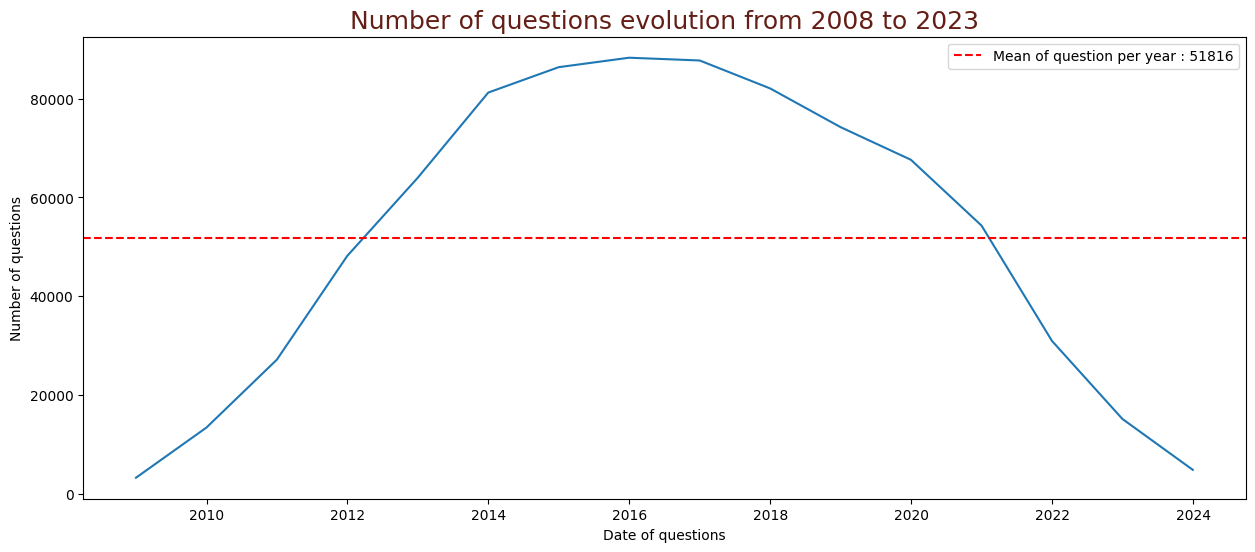

In [13]:
# Plot evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_year, x=post_year.index, y='Title')
plt.axhline(post_year.Title.mean(), 
            color="r", linestyle='--',
            label="Mean of question per year : {:04d}"\
                   .format(int(post_year.Title.mean())))
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions evolution from 2008 to 2023",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

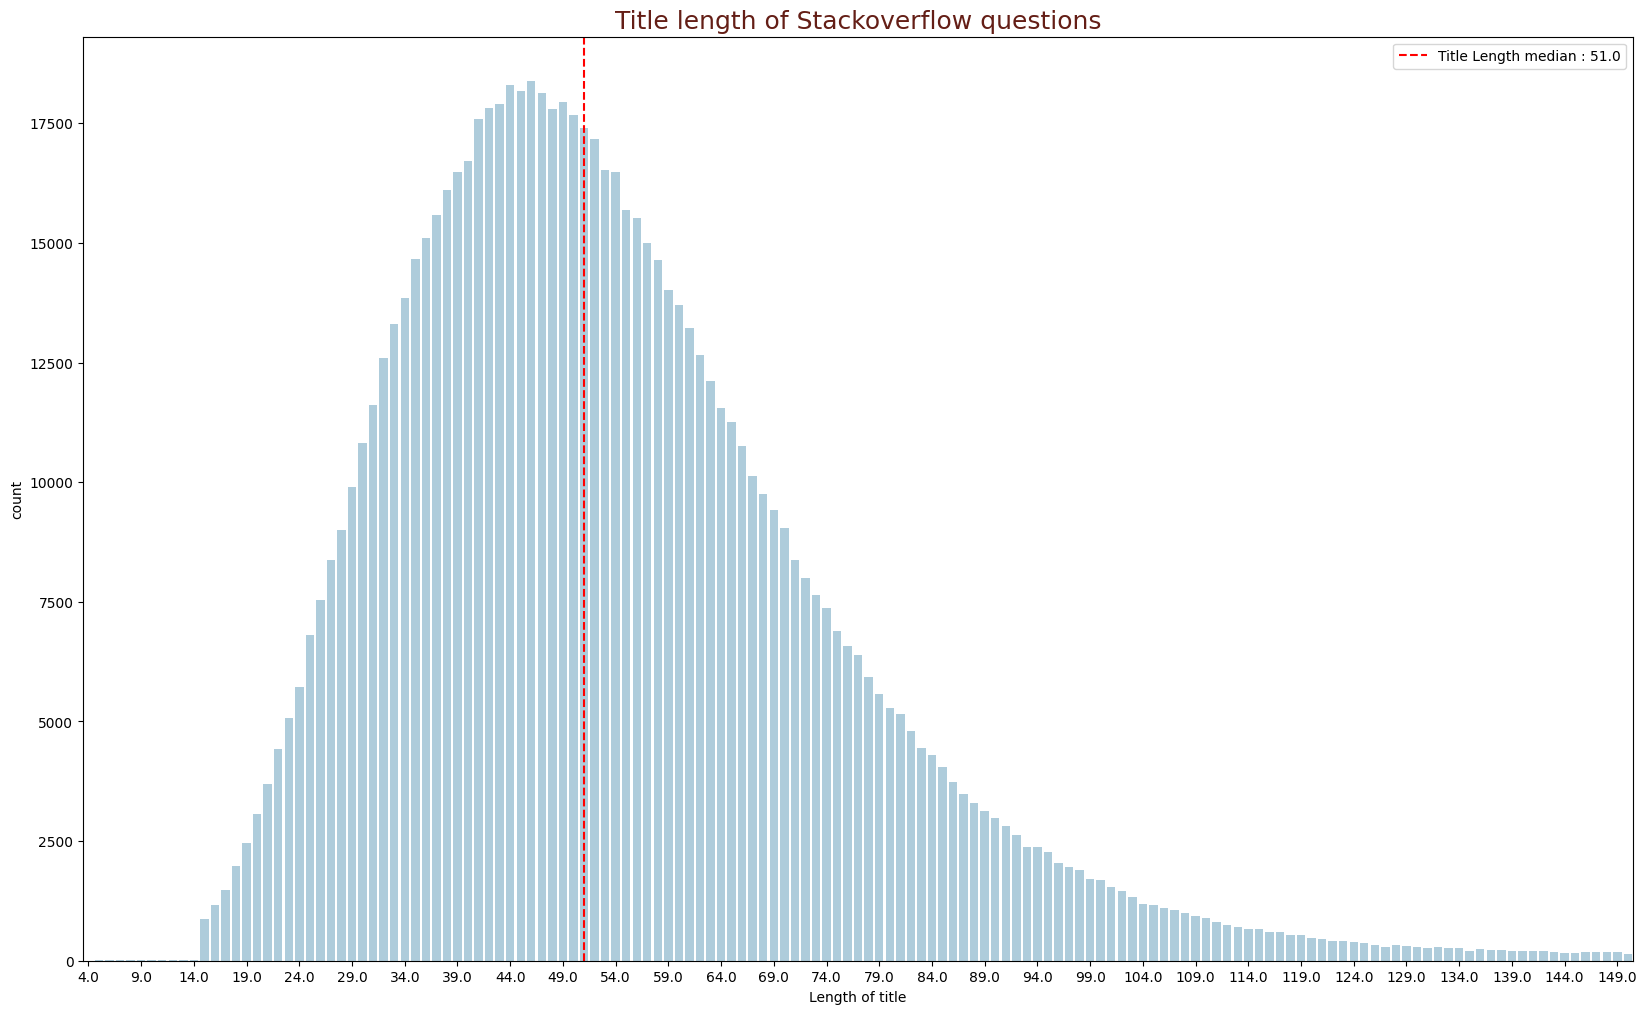

In [14]:
import numpy as np
sns.set_palette("Paired")

count_of_y = pandas_df.Title.str.len().value_counts().rename("counts").reset_index()
fig = plt.figure(figsize=(20, 12))

ax = sns.countplot(x=pandas_df.Title.str.len())

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(pandas_df.Title.str.len().median() - pandas_df.Title.str.len().min(),
            color="r", linestyle='--',
            label="Title Length median : "+str(pandas_df.Title.str.len().median()))
ax.set_xlabel("Length of title")
plt.title("Title length of Stackoverflow questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

## Transform

In [15]:
pandas_df['Tags_list'] = pandas_df['Tags'].apply(preprocessing.extract_tags)
pandas_df.Tags_list


pandas_df['Tags_count'] = pandas_df['Tags_list'].apply(preprocessing.count)
pandas_df.Tags_count

0          5
1          3
2          0
3          3
4          5
          ..
2090411    0
2090412    4
2090413    4
2090414    2
2090415    0
Name: Tags_count, Length: 2090416, dtype: int64

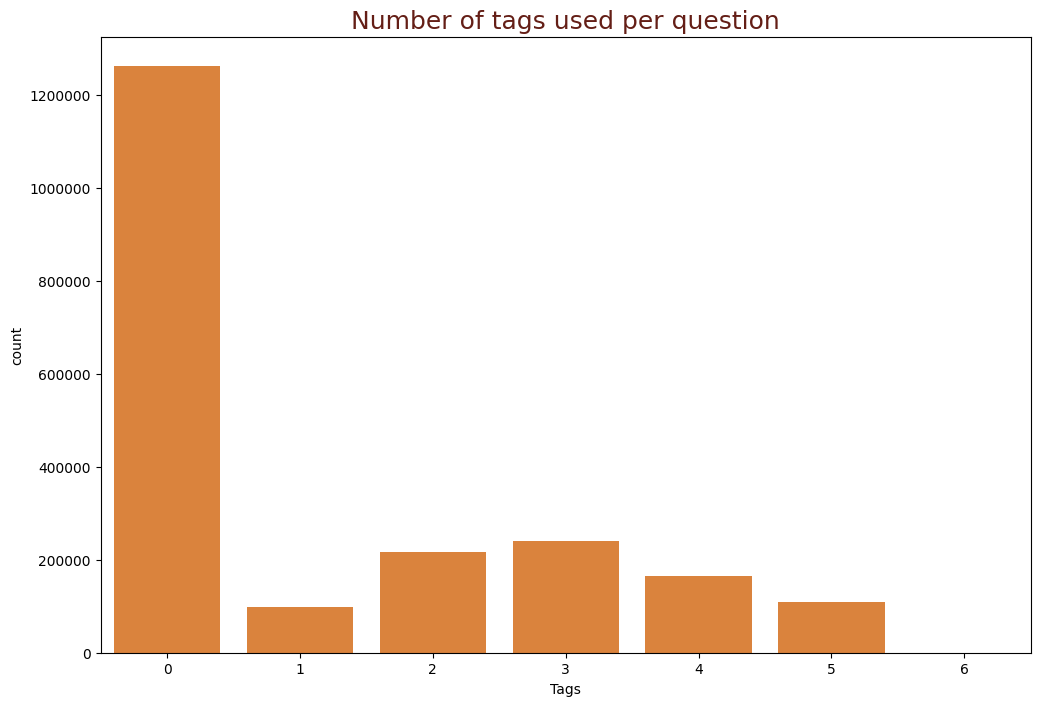

In [16]:
# Plot Number of tags used per questions
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=pandas_df.Tags_count, color="#f48023")

ax.set_xlabel("Tags")
plt.title("Number of tags used per question",
          fontsize=18, color="#641E16")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Remove data where there are no tags

In [17]:
df_with_tags = pandas_df.drop(pandas_df[pandas_df.Tags_count == 0].index).reset_index()
df_with_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829039 entries, 0 to 829038
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  829039 non-null  int64         
 1   Id                     829039 non-null  int64         
 2   PostTypeId             829039 non-null  int64         
 3   AcceptedAnswerId       438123 non-null  float64       
 4   CreationDate           829039 non-null  datetime64[ns]
 5   Score                  829039 non-null  int64         
 6   ViewCount              828975 non-null  float64       
 7   Body                   829016 non-null  object        
 8   OwnerUserId            811190 non-null  float64       
 9   LastEditorUserId       450675 non-null  float64       
 10  LastEditorDisplayName  12204 non-null   object        
 11  LastEditDate           459644 non-null  datetime64[ns]
 12  LastActivityDate       829039 non-null  date

In [18]:
tags = (df_with_tags.Tags_list.explode().value_counts().to_frame().reset_index())
tags

,Tags_list,count
0,javascript,86344
1,java,69490
2,python,66514
3,c#,58154
4,php,54413
...,...,...
40535,omnipascal,1
40536,null-propagation-operator,1
40537,nswindowrestoration,1
40538,om.next,1


In [19]:
top_tags = list(tags.Tags_list.iloc[0:50])
print(top_tags)

['javascript', 'java', 'python', 'c#', 'php', 'android', 'html', 'jquery', 'c++', 'css', 'ios', 'mysql', 'sql', 'r', 'node.js', 'arrays', 'asp.net', 'c', 'ruby-on-rails', 'json', '.net', 'sql-server', 'reactjs', 'objective-c', 'swift', 'python-3.x', 'angularjs', 'django', 'angular', 'excel', 'regex', 'iphone', 'ruby', 'ajax', 'xml', 'linux', 'pandas', 'asp.net-mvc', 'vba', 'spring', 'database', 'wordpress', 'string', 'laravel', 'wpf', 'typescript', 'windows', 'mongodb', 'xcode', 'postgresql']


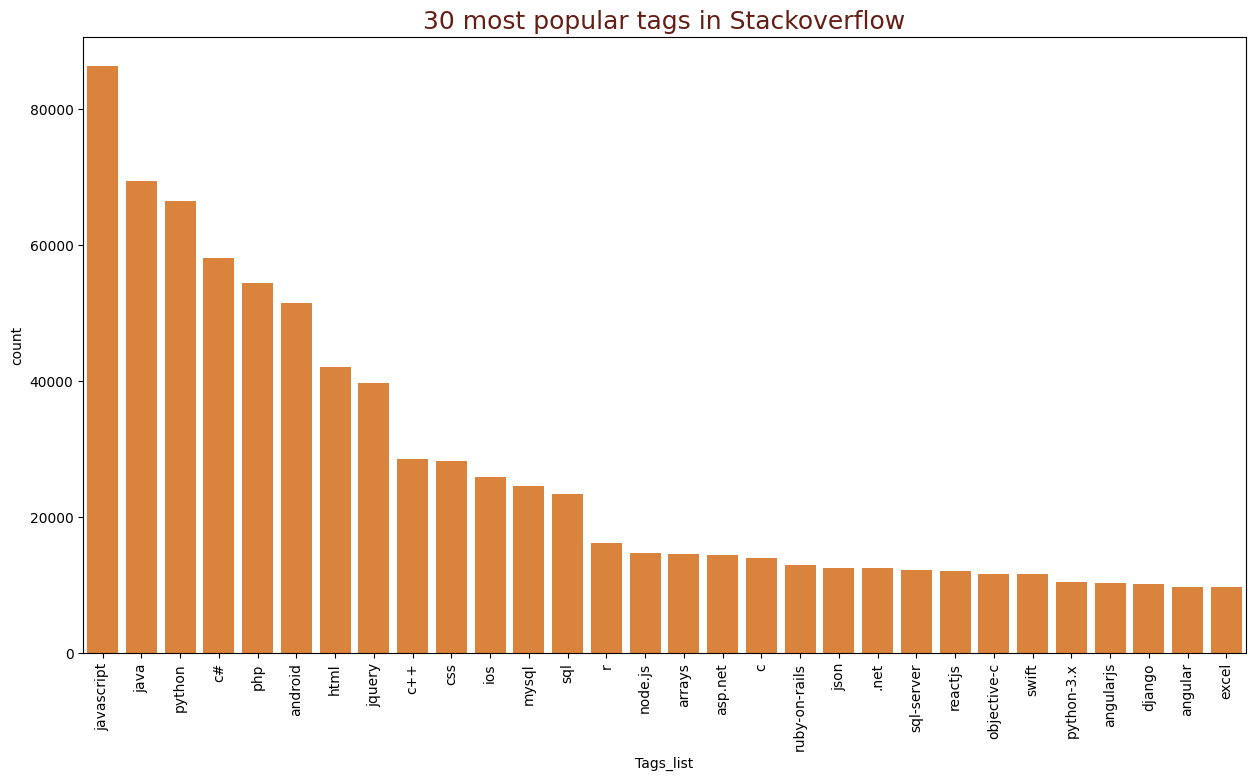

In [20]:
# Plot Number of most popular tags

top =30
ig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags.iloc[0:top,:],
            x=tags.iloc[0:top, :].Tags_list,
            y="count", color="#f48023")
plt.xticks(rotation=90)
plt.title(f"{top} most popular tags in Stackoverflow",
          fontsize=18, color="#641E16")
plt.show()

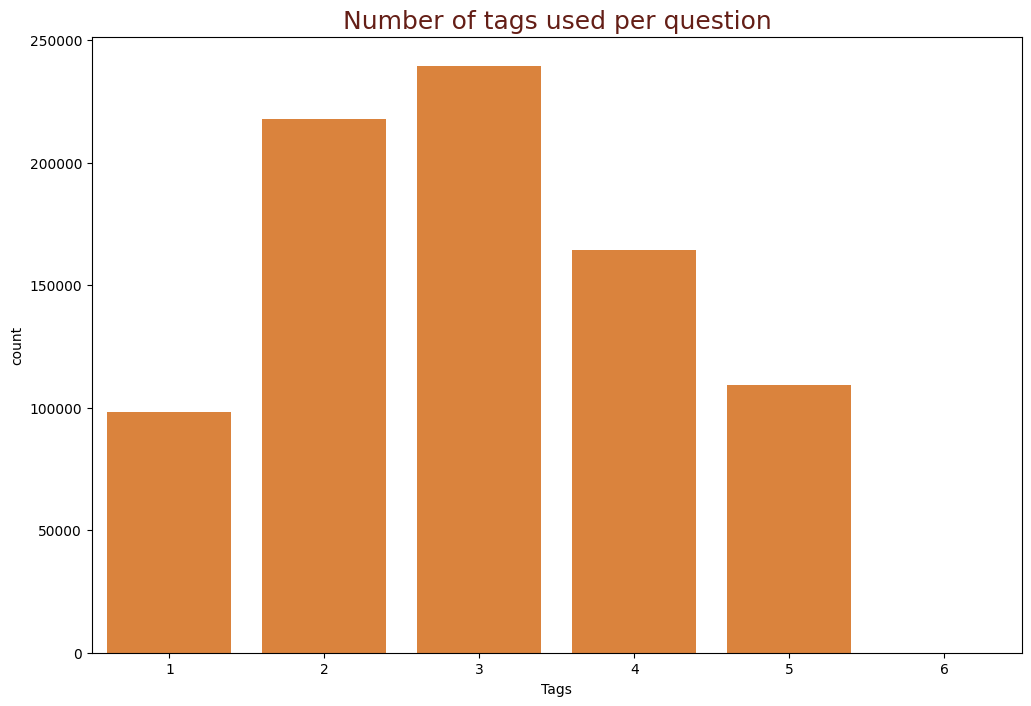

In [21]:
# Plot number of tags used per questions
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df_with_tags.Tags_count, color="#f48023")

ax.set_xlabel("Tags")
plt.title("Number of tags used per question",
          fontsize=18, color="#641E16")

plt.show()

In [22]:
import spacy
import nltk
from nltk.corpus import stopwords

english_model = spacy.load("en_core_web_sm", exclude=["tok2vec", "ner", "parser", "lemmatizer"])
lang = "english"
englis_stop_words = stopwords.words(lang)
wordnet_lemmatizer = nltk.WordNetLemmatizer()
# create ruler to transform
ruler = english_model.get_pipe("attribute_ruler")
pattern = [[{"TEXT": {"REGEX": r"^(.+)?\.(py|xml|java)$"}}]]
attrs = {"POS": "PROPN"}
# Add rules to the attribute ruler
ruler.add(patterns=pattern, attrs=attrs, index=0)

In [23]:
clean_df = feature_pipeline.create_pipe(df_with_tags, 100, wordnet_lemmatizer, englis_stop_words, english_model)

2024-01-02 19:33:20,145 - tag_generator - INFO - Loaded data: (829039, 25)
2024-01-02 19:33:20,145 - tag_generator - INFO - Cleaning Tags info..
2024-01-02 19:33:20,228 - tag_generator - INFO - Removed line where 'Tags' is Nan (829039, 25)


  0%|          | 0/829039 [00:00<?, ?it/s]

  0%|          | 0/829039 [00:00<?, ?it/s]

2024-01-02 19:33:21,779 - tag_generator - INFO - Transformed Tags into Tags List: (829039, 25)
2024-01-02 19:33:21,780 - tag_generator - INFO - Dropping rows where there are no Tags...


                       Tags_list  count
0                     javascript  86344
1                           java  69490
2                         python  66514
3                             c#  58154
4                            php  54413
...                          ...    ...
40535                 omnipascal      1
40536  null-propagation-operator      1
40537        nswindowrestoration      1
40538                    om.next      1
40539                     pigpio      1

[40540 rows x 2 columns]


2024-01-02 19:33:22,489 - tag_generator - INFO - Dropping rows where there are no Tags: (829039, 26)
2024-01-02 19:33:22,489 - tag_generator - INFO - Dropping rows where there are no tags between top tags...


  0%|          | 0/829039 [00:00<?, ?it/s]

2024-01-02 19:33:24,205 - tag_generator - INFO - Dropped rows where there are no Tags: (692883, 28)
2024-01-02 19:33:24,206 - tag_generator - INFO - Cleaned Tags info! (692883, 28)
2024-01-02 19:33:24,207 - tag_generator - INFO - Cleaning Text...
2024-01-02 19:33:24,207 - tag_generator - INFO - Dropping rows where there are no Bodys...
2024-01-02 19:33:24,402 - tag_generator - INFO - Dropped rows where there are no Bodys: (692883, 28)
2024-01-02 19:33:24,403 - tag_generator - INFO - Detecting lang...


Function create_tags_pipe, Took 4.0612 seconds


  0%|          | 0/692883 [00:00<?, ?it/s]

  0%|          | 0/692883 [00:00<?, ?it/s]

  0%|          | 0/692883 [00:00<?, ?it/s]

2024-01-02 19:49:11,187 - tag_generator - INFO - Keeping english content: (679162, 31)
2024-01-02 19:49:11,187 - tag_generator - INFO - Cleaning body...


  0%|          | 0/679162 [00:00<?, ?it/s]

2024-01-02 20:09:32,832 - tag_generator - INFO - Cleaned body: (679162, 33)
2024-01-02 20:09:32,833 - tag_generator - INFO - Cleaning title...


  0%|          | 0/679162 [00:00<?, ?it/s]

2024-01-02 20:11:54,963 - tag_generator - INFO - Cleaned title: (679162, 35)
2024-01-02 20:11:55,715 - tag_generator - INFO - Cleaned Text: (679162, 35)


Function create_text_pipe, Took 2310.7189 seconds
Function create_pipe, Took 2316.0398 seconds


In [24]:
clean_df["top_tags"]

0                          [c#]
1                   [html, css]
2                    [c#, .net]
3                          [c#]
4                        [html]
                  ...          
829031            [spring-boot]
829032                [windows]
829033         [python, apache]
829036    [javascript, reactjs]
829037                     [c#]
Name: top_tags, Length: 676651, dtype: object

In [25]:
selected_col = ["clean_title", "clean_body", "Tags_list", "top_tags"] #, "contains_code"]
col_new_names = {
    "clean_title": "Title",
    "clean_body": "Body",
    "Tags_list": "All_Tags",
     "top_tags": "Tags",
    #"contains_code": "Contains_Code",
}

selected_df = clean_df[selected_col]
selected_df = selected_df.rename(columns=col_new_names)

In [26]:
selected_df.iloc[0]["All_Tags"]
selected_df

,Title,Body,All_Tags,Tags
0,"[convert, decimal, double]","[want, assign, decimal, variable, trans, doubl...","[c#, floating-point, type-conversion, double, ...",[c#]
1,"[width, collapse, percentage, width, child, el...","[absolutely, positioned, containing, several, ...","[html, css, internet-explorer-7]","[html, css]"
2,"[calculate, age, based, datetime, type, birthday]","[given, representing, person, birthday, calcul...","[c#, .net, datetime]","[c#, .net]"
3,"[calculate, relative, time]","[given, specific, value, display, relative, ti...","[c#, datetime, time, datediff, relative-time-s...",[c#]
4,"[determine, user, timezone]","[standard, way, web, server, able, determine, ...","[html, browser, timezone, user-agent, timezone...",[html]
...,...,...,...,...
829031,"[testcontainers, kafka, container, throw, nocl...","[trying, setup, kafka, container, using, testc...","[spring-boot, testcontainers]",[spring-boot]
829032,"[iogetdeviceobjectpointer, return, status_inva...","[want, send, irp, minifilter, another, kernel,...","[windows, kernel, minifilter, irp]",[windows]
829033,"[apache, making, python, acting, differently]","[working, iot, project, using, flask, run, pro...","[python, apache, raspberry-pi, pigpio]","[python, apache]"
829036,"[get, fully, visible, component, using, inters...","[trying, implement, function, show, component,...","[javascript, reactjs, web, intersection-observer]","[javascript, reactjs]"


In [28]:
staged_prefix = prefix.format(stage="final")
output_dir = f"{staged_prefix}/{today.strftime('%Y-%m-%d/%H')}"
print(output_dir)
file_name = f"{time}_final_so_questions_2008_2023.csv"
print(file_name)

Path(output_dir).mkdir(parents=True, exist_ok=True)
selected_df.to_csv(f"{output_dir}/{file_name}")

/Users/tatia/Developer/tag-generator/core/data/final/2024-01-02/19
193120_final_so_questions_2008_2023.csv
